![keras.png](images/keras.png)

In [1]:
from __future__ import print_function
%env KERAS_BACKEND=tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

env: KERAS_BACKEND=tensorflow


C:\Users\wit543\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import visualization tools
import numpy as np
import matplotlib as mpl
from keras.utils import plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# FLOW 
![](images/flow_keras.png)

## 1. Dataset

Keras has a build-in [daset](https://keras.io/datasets) such as [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html), [MNIST](http://yann.lecun.com/exdb/mnist/) and [Boston housing](https://www.kaggle.com/vikrishnan/boston-house-prices). This make it very easy to try out keras

### MNIST
 [MNIST](http://yann.lecun.com/exdb/mnist/) is a image's hand writing data set. 
  
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [3]:
# import dataset
from keras.datasets import mnist
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


(-0.5, 27.5, 27.5, -0.5)

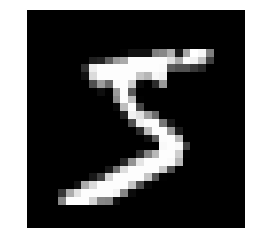

In [4]:
# view current shape
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')

=====x_train=====


<Figure size 1440x144 with 0 Axes>

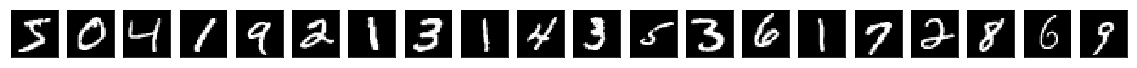

=====y_train=====
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]


In [5]:
# show first 20 images
fig=plt.figure(figsize=(20, 2))
plt.figure(figsize=(20, 4))
n = 20 # number of image to display
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

print("=====x_train=====")
plt.show()
print("=====y_train=====")
print(y_train[:20])
print(y_train[20:40])

In [6]:
# view sample
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 2. Preprocess data
goals:
- tranform the 2d array(x_train and x_test) to be a vector
- tranform the y data (y_train, y_test) to be a categorical

### 2.1 Reshape X

In [7]:
x_size = 28 * 28 # 28 * 28 = 784
x_train = x_train.reshape(x_train.shape[0], x_size) # reshape (60000,28,28) to 60000,784
x_test = x_test.reshape(x_test.shape[0], x_size) #reshape (10000,28,28) to 60000,784

In [8]:
print("x_train's shape; ", x_train.shape)
print("x_test's shape", x_test.shape)

x_train's shape;  (60000, 784)
x_test's shape (10000, 784)


![](images/tranform1d.png)
We reshape the 2d image to be a one dirmentional array so that it will easily connect with the input of the model.

### 2.2 Create categorical Y

In [9]:
# convert class vectors to binary class matrices
num_classes = 10 # number of output in this case: 10 digit (จำนวนข้อมูลออก: 10 เลข)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [10]:
# visualize
print("y_train shape: ",y_train.shape)
print("y_train shape: ",y_train[0])

y_train shape:  (60000, 10)
y_train shape:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


![](images/categorical.png)

We create a Categorical output so that we can use each output node to represent each number.

![](images/input_output_simple.png)
The preprocess step tranform the input and output to make it connect with other.

## 3. Create model
[__Sequential__](https://keras.io/models/sequential/) is the simplest model. It is a layer that is linked together in l sequence.
Note: In this case we will make it easy to buld

In [11]:
model = Sequential() # create a Seuential model
model.add(Dense(32, input_shape=(x_size,)))
model.add(Dense(10, activation='softmax'))

![](images/dense.png)

In [12]:
print(model.summary())
print(model.get_config())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None
[{'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 32, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'clas

## 4. Compile Model

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy, # loss function use for calculate the amount of error
              optimizer=keras.optimizers.Adadelta(), # optimizer for determine how to adjusting the error
              metrics=['accuracy'])

![](images/simple deeplearning.png)

## 5. Train Model

In [14]:
# config
batch_size = 128 # number of training data per time (จำนวนรุปที่รับเข้าไป train ใน แต่ละรอบ)
epochs = 12 # number of trainning cycle (จำนวนรอบในการ train)
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # display the progress
          validation_data=(x_test, y_test)) # input test for validation(try with data that doesn't used in trainning)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1s 22us/step - loss: 7.5448 - acc: 0.5278 - val_loss: 5.9788 - val_acc: 0.6258
Epoch 2/12
60000/60000 [==============================] - 1s 17us/step - loss: 5.7083 - acc: 0.6426 - val_loss: 4.5900 - val_acc: 0.7118
Epoch 3/12
60000/60000 [==============================] - 1s 17us/step - loss: 4.4164 - acc: 0.7233 - val_loss: 4.3141 - val_acc: 0.7296
Epoch 4/12
60000/60000 [==============================] - 1s 16us/step - loss: 4.3159 - acc: 0.7297 - val_loss: 4.1872 - val_acc: 0.7372
Epoch 5/12
60000/60000 [==============================] - 1s 17us/step - loss: 4.2259 - acc: 0.7355 - val_loss: 4.1212 - val_acc: 0.7419
Epoch 6/12
60000/60000 [==============================] - 1s 17us/step - loss: 3.5488 - acc: 0.7762 - val_loss: 3.4630 - val_acc: 0.7819
Epoch 7/12
60000/60000 [==============================] - 1s 17us/step - loss: 3.0980 - acc: 0.8046 - val_loss: 3.1332 - val_acc

# 6. Evaluate the model

In [15]:
score = model.evaluate(x_test, y_test, verbose=0) # calculate a score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.732744088506703
Test accuracy: 0.8284


### 7 Using the model

x_test[0] shape:  (1, 784)


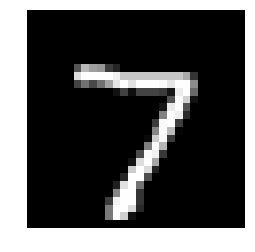

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [16]:
print("x_test[0] shape: ",x_test[0].reshape(1, 28*28).shape)
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()
model.predict(x_test[0].reshape(1, x_size))
